In [11]:
import pandas as pd

In [12]:
bm_data = pd.read_csv('gist-baemin.csv')
bm_data

,Unnamed: 0,storeNo,name,lat,lng,address
0,0,13655029,바른국밥 첨단점,35.211722,126.837374,광주광역시 광산구 첨단내촌로 56 1층(월계동)
1,1,13701546,록시드갸토 첨단아크레타점,35.214249,126.846429,"광주광역시 광산구 임방울대로800번길 71 아크레타 첨단1층 105,106호(월계동)"
2,2,10646557,크리스피크림도넛 광주첨단점,35.217221,126.842457,"광주광역시 광산구 월계동 867-1 1층 113,114(일부)호 (월계동, 첨단센츄..."
3,3,13414085,인끼밥상,35.218221,126.845623,"광주광역시 광산구 쌍암동 669-4 (쌍암동,105.106호(1층))"
4,4,13911414,챙길 밥 첨단신도시점,35.210916,126.837069,광주광역시 광산구 첨단내촌로 45-4 1층(월계동)
...,...,...,...,...,...,...
2041,2041,13203939,쏘핫 마라탕&마라샹궈,35.206500,126.859484,광주광역시 북구 첨단연신로91번길 44 대성빌딩 1층 108호(신용동)
2042,2042,13447691,까로치아 첨단점,35.211305,126.838069,광주광역시 광산구 월계동 835-4 1층(월계동)
2043,2043,13885594,하이덮밥,35.203890,126.870372,"광주광역시 북구 양산제로 109-7 , 1층(연제동)"
2044,2044,13203939,쏘핫 마라탕&마라샹궈,35.206500,126.859484,광주광역시 북구 첨단연신로91번길 44 대성빌딩 1층 108호(신용동)


In [13]:
bm_data_latlng = bm_data[['lat','lng']]

In [14]:
bm_data_latlng

,lat,lng
0,35.211722,126.837374
1,35.214249,126.846429
2,35.217221,126.842457
3,35.218221,126.845623
4,35.210916,126.837069
...,...,...
2041,35.206500,126.859484
2042,35.211305,126.838069
2043,35.203890,126.870372
2044,35.206500,126.859484


In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

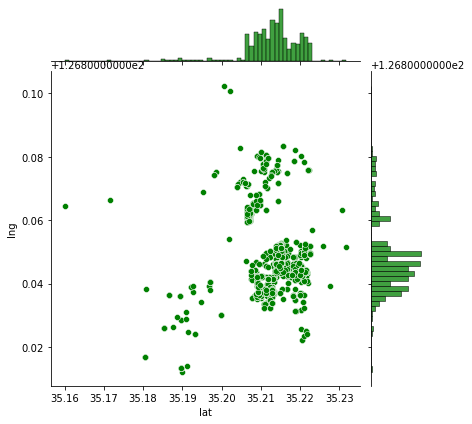

In [7]:
sns.jointplot(x=bm_data_latlng['lat'],y=bm_data_latlng['lng'],color='green',kind='scatter')

In [8]:
from sklearn.cluster import KMeans

In [9]:
ks = range(1,500)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(bm_data_latlng)
    inertias.append(model.inertia_)
    if k%10 == 0:
        print(str(k/10)+"% complete")


1.0% complete
2.0% complete
3.0% complete
4.0% complete
5.0% complete
6.0% complete
7.0% complete
8.0% complete


KeyboardInterrupt: 

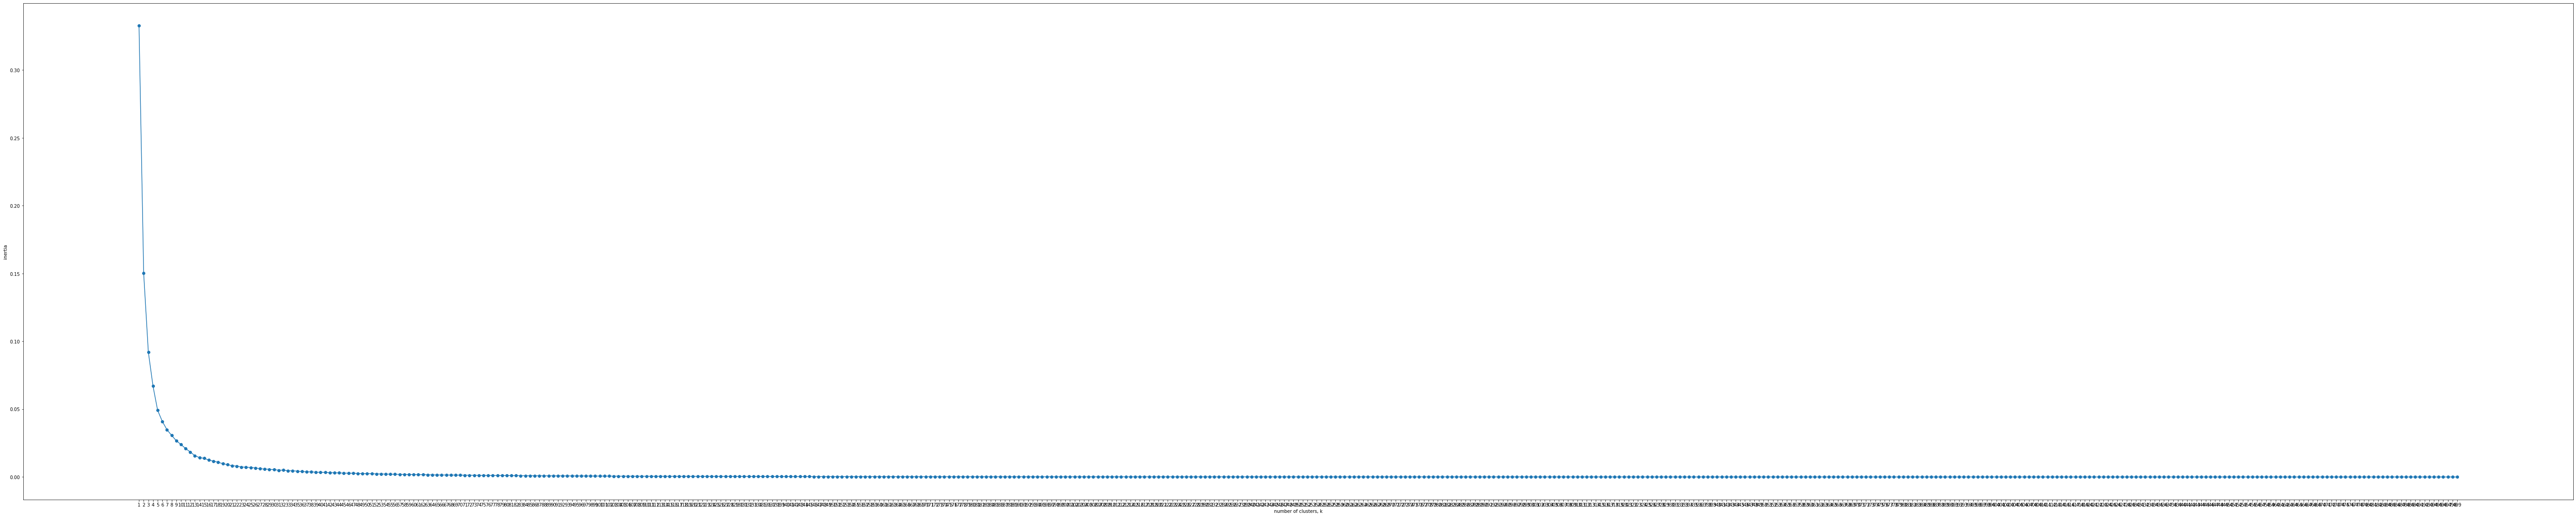

In [10]:
# Plot ks vs inertias
plt.figure(figsize=(100, 20))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [16]:
# K-means 모델과 군집 예측값을 생성

# 클러스터 모델 생성, 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters=35)

clust_model.fit(bm_data_latlng)

centers = clust_model.cluster_centers_
pred =  clust_model.predict(bm_data_latlng)

print(pd.DataFrame(centers))
print(pred[:15])

            0           1
0   35.188942  126.837130
1   35.221781  126.849512
2   35.207172  126.862531
3   35.212667  126.838047
4   35.213612  126.875127
5   35.216232  126.849683
6   35.220137  126.842967
7   35.210622  126.847197
8   35.180530  126.816932
9   35.221137  126.824118
10  35.205345  126.871520
11  35.201446  126.901563
12  35.214798  126.845970
13  35.212042  126.834270
14  35.165769  126.865428
15  35.209760  126.837781
16  35.212119  126.841708
17  35.189908  126.813245
18  35.219160  126.835033
19  35.196492  126.839451
20  35.188517  126.826800
21  35.210291  126.868817
22  35.206728  126.860088
23  35.215085  126.848701
24  35.214644  126.851746
25  35.221239  126.877173
26  35.219221  126.845419
27  35.210784  126.878973
28  35.208985  126.842003
29  35.199945  126.829959
30  35.214193  126.843606
31  35.197753  126.873674
32  35.221629  126.852117
33  35.208884  126.865095
34  35.216787  126.842921
[ 3 12 34 26 15 26 26 16  6  7 15 22 12 26 23]


In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scale = scaler.fit_transform(bm_data_latlng)

k = 35

model = KMeans(n_clusters=k,random_state=10)

model.fit(data_scale)
bm_data_latlng['cluster'] = model.fit_predict(data_scale)

bm_data_latlng

/var/folders/tp/dcr77srx31sfjt_0ldrqb0hh0000gn/T/ipykernel_4108/481200696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm_data_latlng['cluster'] = model.fit_predict(data_scale)


,lat,lng,cluster
0,35.211722,126.837374,19
1,35.214249,126.846429,9
2,35.217221,126.842457,5
3,35.218221,126.845623,11
4,35.210916,126.837069,16
...,...,...,...
2041,35.206500,126.859484,7
2042,35.211305,126.838069,19
2043,35.203890,126.870372,10
2044,35.206500,126.859484,7


In [17]:
clust_df = bm_data_latlng.copy()
clust_df['clust'] = pred
clust_df

,lat,lng,clust
0,35.211722,126.837374,3
1,35.214249,126.846429,12
2,35.217221,126.842457,34
3,35.218221,126.845623,26
4,35.210916,126.837069,15
...,...,...,...
2041,35.206500,126.859484,22
2042,35.211305,126.838069,3
2043,35.203890,126.870372,10
2044,35.206500,126.859484,22


In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(clust_df.iloc[:,0:4]), columns=clust_df.iloc[:,0:4].columns)

In [20]:
clust_model.fit(scaled_df)

centers_s = clust_model.cluster_centers_
pred_s = clust_model.predict(scaled_df)

In [21]:
clust_df['clust_s'] = pred_s
clust_df

,lat,lng,clust,clust_s
0,35.211722,126.837374,3,9
1,35.214249,126.846429,12,2
2,35.217221,126.842457,34,24
3,35.218221,126.845623,26,13
4,35.210916,126.837069,15,5
...,...,...,...,...
2041,35.206500,126.859484,22,3
2042,35.211305,126.838069,3,9
2043,35.203890,126.870372,10,17
2044,35.206500,126.859484,22,3


In [22]:
cluster_mean = clust_df.groupby('clust').mean()
cluster_mean.to_csv('clustered.csv',mode='w',index=False)
len(cluster_mean)

35

In [33]:
clust_df = clust_df.sort_values('clust')
bm_data_latlng


,lat,lng,cluster
0,35.211722,126.837374,19
1,35.214249,126.846429,9
2,35.217221,126.842457,5
3,35.218221,126.845623,11
4,35.210916,126.837069,16
...,...,...,...
2041,35.206500,126.859484,7
2042,35.211305,126.838069,19
2043,35.203890,126.870372,10
2044,35.206500,126.859484,7


In [29]:
clust_df.sort_values('clust')
clust_count = [0]*35

for i in range(len(clust_df)):
    clust_num = int(clust_df.iloc[i]['clust'])
    clust_count[clust_num-1] = clust_count[clust_num-1] + 1

ccdf = pd.DataFrame(clust_count)
ccdf.to_csv('clusterCount.csv',mode='w',index=False)

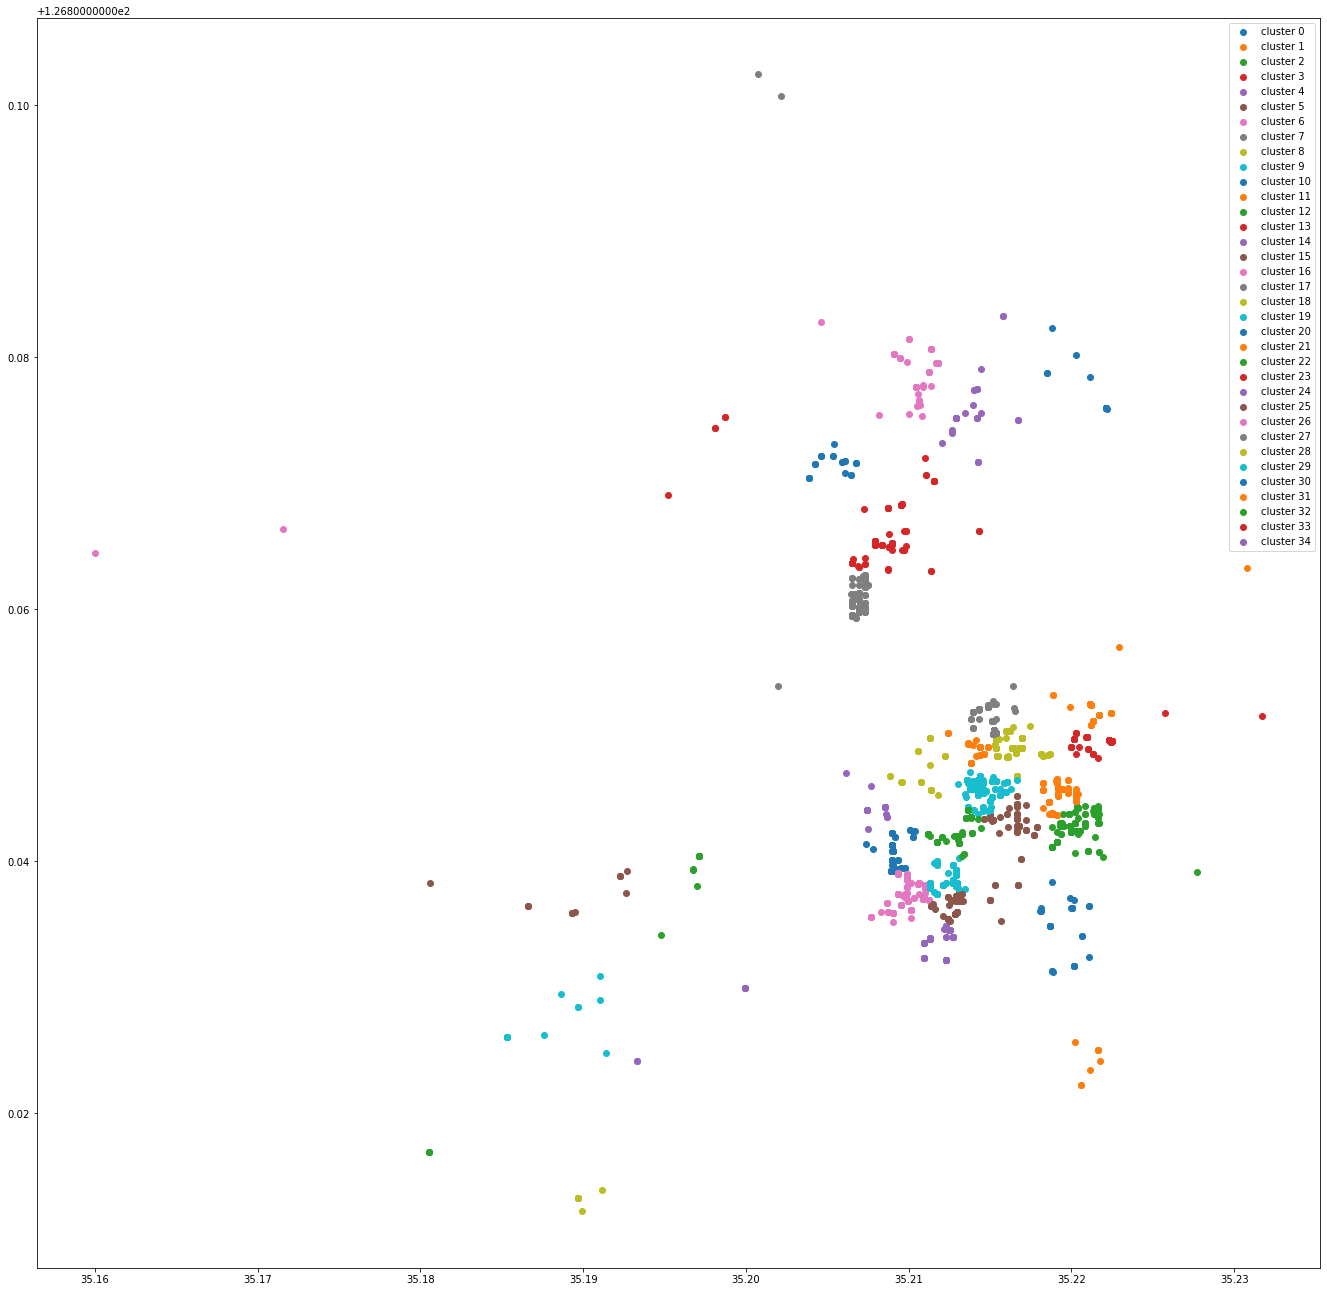

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (23, 23))

for i in range(k):
    plt.scatter(bm_data_latlng.loc[bm_data_latlng['cluster']==i,'lat'],bm_data_latlng.loc[bm_data_latlng['cluster']==i,'lng'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.show()